In [40]:
#Importando as bibliotecas
from mysql.connector import Error, connect
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

UsageError: unrecognized arguments: #usar esse comando para não precisar dar plt.show em cada gráfico


In [92]:
#Configuração para visualização dos gráficos
sns.set_theme(palette='crest_r')

In [13]:
#Carregando as variáveis de ambiente
load_dotenv()

True

In [14]:
#Criando conexão com o banco de dados
conn = connect(
    host=os.getenv("HOST"),
    user=os.getenv("LOGIN"),
    password=os.getenv("SENHA"),
    database=os.getenv("DW")
)

In [15]:
#conn.close()

In [16]:
# Teste
# cursor = conn.cursor()
# cursor.execute("select * from fatocursodeficiencia")
# rows = cursor.fetchall()
# cursor.close()
# print(rows[0])

In [17]:
df_fato = pd.read_sql("select * from fatocursodeficiencia", con=conn)
df_fato.head()

,num_recursos,num_matriculados,num_concluintes,dimcurso_key,dimcurso_cod_curso,dimrecursoacessibilidade_key,dimrecursoacessibilidade_codigo_curso,dimaluno_key,dimaluno_id_aluno,dimies_key,dimies_cod_ies,dimano_key,dimano_ano,dimdeficiencia_key,dimdeficiencia_id_aluno,dimregiao_key,dimregiao_cod_municipio
0,1.0,447,75,1,1,1,1,1,1,1,1,1,2019,1,1,1,5103403
1,1.0,447,75,1,1,1,1,2,2,1,1,1,2019,2,2,1,5103403
2,1.0,447,75,1,1,1,1,3,3,1,1,1,2019,3,3,1,5103403
3,1.0,447,75,1,1,1,1,4,4,1,1,1,2019,4,4,1,5103403
4,1.0,447,75,1,1,1,1,5,5,1,1,1,2019,5,5,1,5103403


#Queries para o Data WareHouse

1. Quais estados têm mais alunos com deficiência matriculados no ensino superior?

In [45]:
query1 = ('select count(f.dimaluno_key) as `alunos com deficiência`, r.estado from md03_dw.fatocursodeficiencia f ' 
'join md03_dw.dimregiao r on f.dimregiao_key = r.`key` group by r.estado order by `alunos com deficiência` desc limit 10;')
df_alunos_def_por_estado = pd.read_sql(query1, con=conn)

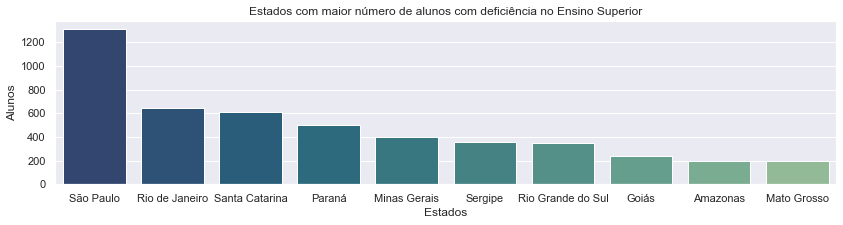

In [94]:
plt.rcParams['figure.figsize'] = (14,3)
sns.barplot(data = df_alunos_def_por_estado, x = 'estado', y = 'alunos com deficiência',palette='crest_r')
plt.title('Estados com maior número de alunos com deficiência no Ensino Superior')
plt.xlabel('Estados')
plt.ylabel('Alunos')
plt.savefig('figura1.png', transparent = True)

2. Como os alunos com deficiência estão distribuídos pela raça no ensino superior?

In [63]:
query2 = ('select raca as raça, count(`key`) as `alunos com deficiência` from dimaluno a '
'where a.raca in ("preta", "parda", "amarela", "branca") group by a.raca')
df_alunos_raca = pd.read_sql(query2, con=conn)

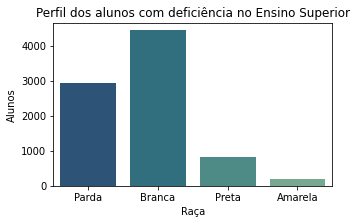

In [62]:
plt.rcParams['figure.figsize'] = (5,3)
sns.barplot(data = df_alunos_raca, x = 'raça', y = 'alunos com deficiência',palette='crest_r')
plt.title('Perfil dos alunos com deficiência no Ensino Superior')
plt.xlabel('Raça')
plt.ylabel('Alunos')
plt.savefig('figura2.png', transparent = True)

3. Em quais estados há mais alunos matriculados com deficiência auditiva?

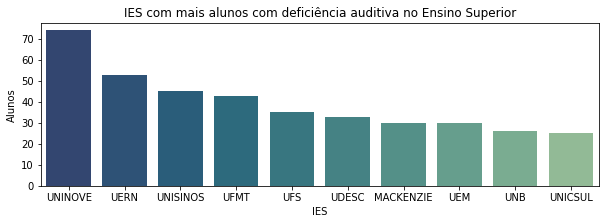

In [81]:
query3 = ('select sum(d.deficiencia_auditiva) as `deficiência auditiva`, i.sigla '
'from md03_dw.fatocursodeficiencia f join md03_dw.dimdeficiencia d on f.dimdeficiencia_key = d.`key` '
'join md03_dw.dimies i on f.dimies_key = i.`key` group by i.nome order by `deficiência auditiva` desc limit 10')
df_defauditiva_por_ies = pd.read_sql(query3, con=conn)
plt.rcParams['figure.figsize'] = (10,3)
sns.barplot(data = df_defauditiva_por_ies, x = 'sigla', y = 'deficiência auditiva',palette='crest_r')
plt.title('IES com mais alunos com deficiência auditiva no Ensino Superior')
plt.xlabel('IES')
plt.ylabel('Alunos')
plt.savefig('figura3.png', transparent = True)

4. Qual a região com mais alunos matriculados com deficiência?

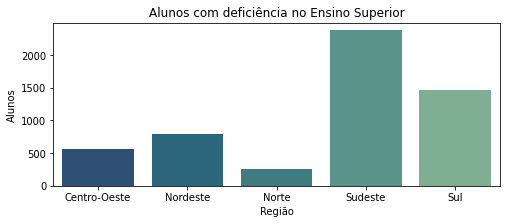

In [82]:
query4 = ('select count(f.dimaluno_key) as alunos, r.regiao '
'from md03_dw.fatocursodeficiencia f join md03_dw.dimregiao r on f.dimregiao_key = r.`key` '
'group by r.regiao')
df_matriculados_por_regiao = pd.read_sql(query4, con=conn)
plt.rcParams['figure.figsize'] = (8,3)
sns.barplot(data = df_matriculados_por_regiao, x = 'regiao', y = 'alunos',palette='crest_r')
plt.title('Alunos com deficiência no Ensino Superior')
plt.xlabel('Região')
plt.ylabel('Alunos')
plt.savefig('figura4.png', transparent = True)

5. Quantos cursos possuem todos os tipos de recursos de acessibilidade?

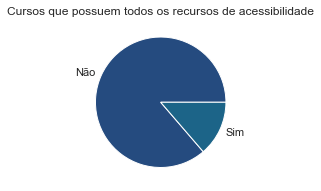

In [116]:
query5 = ('select count(r.key) as cursos, '
'r.mdig_mampl_mtat_mimp_maud_mbrai_mlib_dlib_tlib_ginter_rcom_rinfo as `todos os recursos` '
'from md03_dw.dimrecursosacessibilidade r group by '
'r.mdig_mampl_mtat_mimp_maud_mbrai_mlib_dlib_tlib_ginter_rcom_rinfo')
df_todos_recursos = pd.read_sql(query5, con=conn)
labels = ['Não','Sim']
plt.rcParams['figure.figsize'] = (5,3)
colors = sns.color_palette('crest_r')
plt.pie(data = df_todos_recursos, x = "cursos", labels=labels, colors=colors)
plt.title('Cursos que possuem todos os recursos de acessibilidade')
plt.savefig('figura5.png', transparent = True)

In [ ]:
plt.rcParams['figure.figsize'] = (5,3)
sns.barplot(data = df_alunos_raca, x = 'raça', y = 'alunos com deficiência',palette='crest_r')
plt.title('Perfil dos alunos com deficiência no Ensino Superior')
plt.xlabel('Raça')
plt.ylabel('Alunos')
plt.savefig('figura5.png', transparent = True)

In [31]:
#extra
queryb = 'select sum(f.num_matriculados) as matriculados, r.estado from md03_dw.fatocursodeficiencia f join md03_dw.dimregiao r on f.dimregiao_key = r.`key` group by r.estado order by matriculados desc'
df_matriculados_por_estado = pd.read_sql(queryb, con=conn)
df_matriculados_por_estado.head()

,matriculados,estado
0,1957167.0,São Paulo
1,407899.0,Rio de Janeiro
2,208388.0,Paraná
3,205248.0,Santa Catarina
4,166257.0,Minas Gerais
